# Partially coherent structured modes and their cross-correlation (new version)
In this notebook we study optical vortices in the partially coherent regime.  First, we load a set of functions for this task.

In [1]:
include("/mnt/bendata/Documents/Docs/PhysicsLocal/Beams/Parmember.jl");  # this also loads beams.jl and MatrixTrans.jl
using Plots

## Grid definition
Lets define the numerical grid

In [3]:
# Size of numerical window
w0 = 1.0 
xmax = 4*w0
points = 100

# Generates ranges for xs and ys
xs = xmax*(2/points)*collect(range(-points/2,length=points,stop=points/2-1))
ys = xmax*(2/points)*collect(range(-points/2,length=points,stop=points/2-1))

# Generates matrices Matlab-style
mx, ny = length(xs), length(ys)
Xs = reshape(xs, mx, 1)
Ys = reshape(ys, 1, ny);

## Laguerre-Gaussian mode

We need a seed beam

In [4]:
# Beam parameters
wLG = w0
wV = 2*w0
l = 1
p = 0

# Seed beam
Useed = LaguerreGaussBeam.(Xs, Ys, wLG, 0.0, l, p);
# Useed = SmallCoreBeam.(Xs, Ys, wLG, wV, 0.0, 1.0*l);

Partially coherent version of the seed beam

In [6]:
# Statistical parameters
circle = w0 * 0.7
N = 100
Ne = 100
XYsize = Xs[2]-Xs[1]

# Partially coherent generation
@time I, XI = ensemblePCmt(Useed, points, points, XYsize, circle, N, Ne)

# Normalization 
absI = abs.(I)
absXI = abs.(XI)    # puede ser angle.()!!!
absIlg = absI/maximum(absI)
absXIlg = absXI/maximum(absXI);

  3.235528 seconds (173.41 k allocations: 8.212 GiB, 15.47% gc time)


### Results
Display the intensity and cross correlation

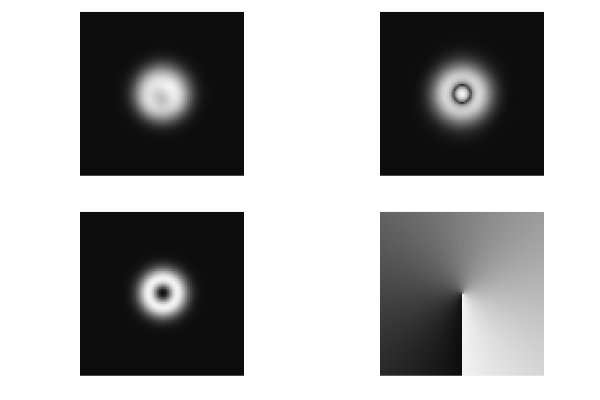

In [7]:
p1 = heatmap(absIlg, aspect_ratio=1, color=:grays, axis=:off, colorbar=:false)
p2 = heatmap(sqrt.(absXIlg), aspect_ratio=1, color=:grays, axis=:off, colorbar=:false)
p3 = heatmap(abs2.(Useed), aspect_ratio=1, color=:grays, axis=:off, colorbar=:false)
p4 = heatmap(angle.(Useed), aspect_ratio=1, color=:grays, axis=:off, colorbar=:false)
plot(p1, p2, p3, p4, layout=(2,2))

## Hermite-Gaussian mode

In [9]:
# Beam parameters
wHG = w0
m = 1
n = 2
Useed = HermiteGaussBeam.(Xs, Ys, w0, 0.0, m, n);

In [10]:
# Statistical parameters
circle = w0 * 0.9
N = 300
Ne = 500
XYsize = Xs[2]-Xs[1]

# Partially coherent generation
@time I, XI = ensemblePCmt(Useed, points, points, XYsize, circle, N, Ne)

# Normalization 
absI = abs.(I)
absXI = abs.(XI)
absIhg = absI/maximum(absI)
absXIhg = absXI/maximum(absXI);

 26.771649 seconds (2.47 M allocations: 114.866 GiB, 34.61% gc time)


### Results

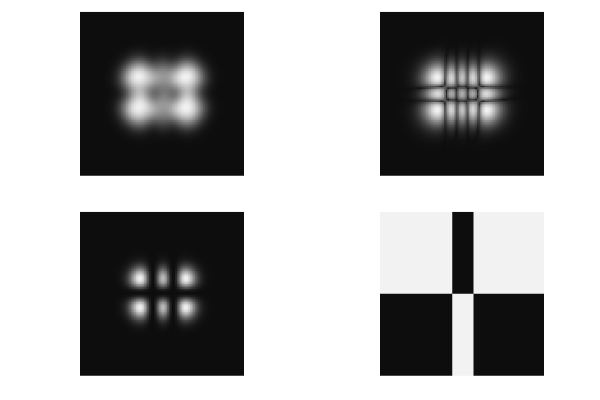

In [11]:
p1 = heatmap(absIhg, aspect_ratio=1, color=:grays, axis=:off, colorbar=:false)
p2 = heatmap(sqrt.(absXIhg), aspect_ratio=1, color=:grays, axis=:off, colorbar=:false)
p3 = heatmap(abs2.(Useed), aspect_ratio=1, color=:grays, axis=:off, colorbar=:false)
p4 = heatmap(angle.(Useed), aspect_ratio=1, color=:grays, axis=:off, colorbar=:false)
plot(p1, p2, p3, p4, layout=(2,2))

## Ince-Gaussian

In [84]:
# Beam parameters
wIG = w0
p = 6
m = 2
q = 0.9
kind = 2

# Pre-calculates Ince coefficients
if kind == 0
    Cs = CInceCoef(p,m,q)
elseif kind == 1
    Ss = SInceCoef(p,m,q)
else
    Cs = CInceCoef(p,m,q)
    Ss = SInceCoef(p,m,q)
end

# Seed beam!  IG beams are funny!  @_@
if kind == 0 # IG even
    IGE = IGBeamE.(Xs, Ys, wIG, 0.0, p, m, q, (Cs,))
    #NormN = IGE[abs2.(IGE).==maximum(abs2.(IGE))]
    #NormP = IGE[angle.(IGE).==maximum(angle.(IGE))]
    Useed = IGE

elseif kind == 1 # IG odd
    IGO = IGBeamO.(Xs, Ys, wIG, 0.0, p, m, q, (Ss,))
    #NormN = IGO[abs2.(IGO).==maximum(abs2.(IGO))]
    #NormP = IGE[angle.(IGE).==maximum(angle.(IGE))]
    Useed = IGO

else # kind == 2 # IG helical
    IGE = IGBeamE.(Xs, Ys, wIG, 0.0, p, m, q, (Cs,))
    NormE = IGE[abs2.(IGE).==maximum(abs2.(IGE))]
    IGE = IGE/NormE[1]
    IGO = IGBeamO.(Xs, Ys, wIG, 0.0, p, m, q, (Ss,))
    NormO = IGO[abs2.(IGO).==maximum(abs2.(IGO))]
    IGO = IGO/NormO[1]
    Useed = IGE+im*IGO
    #Norm = Uaux[abs2.(Useed).==maximum(abs2.(Useed))]
    #Useed = Uaux/Norm[1]
end;

In [85]:
# Statistical parameters
circle = w0 * 0.9
N = 300
Ne = 500
XYsize = Xs[2]-Xs[1]

# Partially coherent generation
@time I, XI = ensemblePCmt(Useed, points, points, XYsize, circle, N, Ne)

# Normalization 
absI = abs.(I)
absXI = abs.(XI)
absIig = absI/maximum(absI)
absXIig = absXI/maximum(absXI);

 28.902787 seconds (2.47 M allocations: 115.208 GiB, 37.47% gc time)


### Results

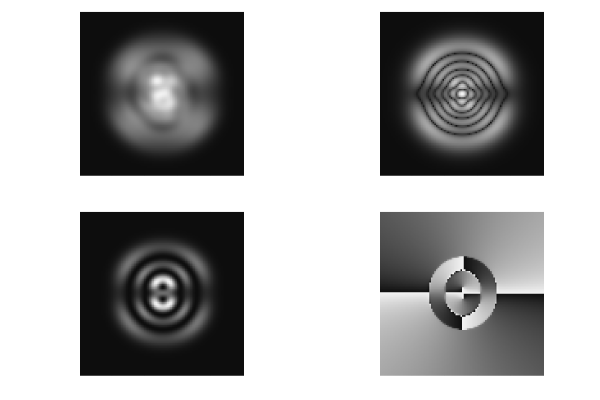

In [86]:
p1 = heatmap(absIig, aspect_ratio=1, color=:grays, axis=:off, colorbar=:false)
p2 = heatmap(sqrt.(absXIig), aspect_ratio=1, color=:grays, axis=:off, colorbar=:false)
p3 = heatmap(abs2.(Useed), aspect_ratio=1, color=:grays, axis=:off, colorbar=:false)
p4 = heatmap(angle.(Useed), aspect_ratio=1, color=:grays, axis=:off, colorbar=:false)
plot(p1, p2, p3, p4, layout=(2,2))

# Inner product (modal decomposition)

Now we turn our attention to perform an "inner product" of partially coherent beams

In [8]:
using FFTW

┌ Info: Recompiling stale cache file /home/ben/.julia/compiled/v1.0/FFTW/PvIn2.ji for FFTW [7a1cc6ca-52ef-59f5-83cd-3a7055c09341]
└ @ Base loading.jl:1190


Let us define the numerical grid 

In [11]:
# Size of numerical window
w0 = 1.0 
xmax = 4*w0
points = 100

# Generates ranges for xs and ys
xs = xmax*(2/points)*collect(range(-points/2,length=points,stop=points/2-1))
ys = xmax*(2/points)*collect(range(-points/2,length=points,stop=points/2-1))

# Generates matrices Matlab-style
mx, ny = length(xs), length(ys)
Xs = reshape(xs, mx, 1)
Ys = reshape(ys, 1, ny);

The strategy is to generate the complex conjugate of the beam using the same statistical strategy as for the generation.  Our first attempt is to use vortex beams for such a task.

In [12]:
# Beam parameters
wLG = w0
wV = 2*wLG
l1 = 1
ltest = 2
p = 0

# Seed beams
U1 = SmallCoreBeam.(Xs, Ys, wLG, wV, 0.0, 1.0*l1)
Utest = SmallCoreBeam.(Xs, Ys, wLG, wV, 0.0, 1.0*ltest);

Fun part!

In [13]:
# Statistical parameters
circle = w0 * 0.9
N = 300
Ne = 500
XYsize = Xs[2]-Xs[1]

# Partially coherent fields
I1,XI1 = ensemblePCmt(U1, points, points, XYsize, circle, N, Ne)
I2,XI2 = ensemblePCmt(Utest, points, points, XYsize, circle, N, Ne);

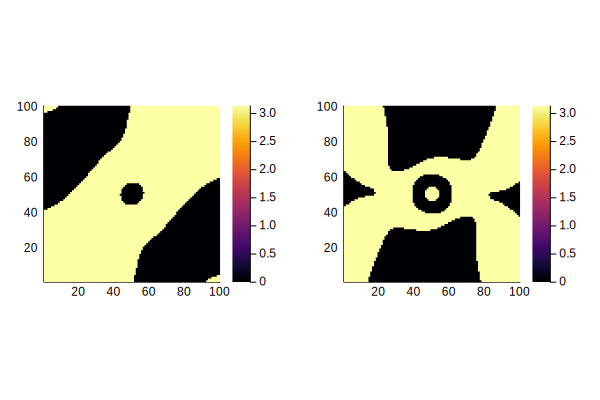

In [14]:
p1 = heatmap(angle.(XI1), aspect_ratio=1)
p2 = heatmap(angle.(-(XI2)), aspect_ratio=1)
plot(p1, p2, layout=(1,2))

In [63]:
InnXI = XI1 .* (-(XI2))
FTInnXI = fftshift(fft(InnXI));

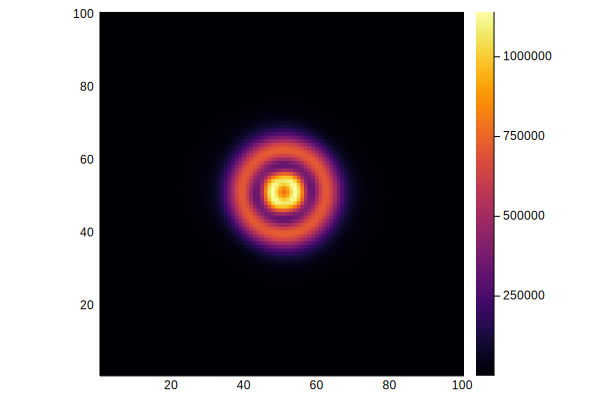

In [64]:
heatmap(abs.(FTInnXI), aspect_ratio=1)